In [1]:
import tensorflow as tf
import tensorflow_addons as tfa
import pandas as pd 
import os 
import pickle
import typing as tp
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme(rc={'figure.figsize': (8.25, 5.875), 'figure.dpi': 100, 'axes.labelpad': 2, 'savefig.pad_inches': .5})

2022-10-02 23:46:12.674773: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-02 23:46:12.784253: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib/cuda/include:/usr/lib/cuda/lib64:
2022-10-02 23:46:12.784269: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-02 23:46:12.805932: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10

In [2]:
df_correct: pd.DataFrame = pd.read_pickle(os.path.join('..', 'data', 'SemesterProject', 'processed_data.pkl'))
df_incorrect: pd.DataFrame = pd.read_pickle(os.path.join('..', 'data', 'SemesterProject', 'processed_data_incorrect.pkl'))
df: pd.DataFrame = pd.concat([df_correct, df_incorrect], ignore_index=True)
df

,movement_id,subject_id,episode_num,positions,angles,positions_path,angles_path,skeleton,is_correct_movements,movement_name,filled_skeleton,reshaped_skeleton
0,4,6,3,"[[-3.02874, 75.90507, -270.5936, 0.0, 27.79706...","[[0.14469, 0.65008, -0.55925, 2.28859, 1.14512...",../data/SemesterProject/Segmented Movements/Ki...,../data/SemesterProject/Segmented Movements/Ki...,"[[[-3.02874, -3.0521766666666665, -3.233198000...",True,side_lunge,"[[[-3.02874, -3.02874, -3.0521766666666665, -3...","[[[-3.02874, -3.02874, -3.0521766666666665], [..."
1,5,7,8,"[[-1.38662, 84.46687, -232.60986, 0.0, 28.7417...","[[1.29924, -0.9601, -1.45577, 1.84614, 0.07701...",../data/SemesterProject/Segmented Movements/Ki...,../data/SemesterProject/Segmented Movements/Ki...,"[[[-1.38662, -1.3767133333333332, -1.343484, -...",True,sit_to_stand,"[[[-1.38662, -1.3767133333333332, -1.343484, -...","[[[-1.38662, -1.3767133333333332, -1.343484], ..."
2,3,1,7,"[[-12.26233, 81.59789, -248.86124, -2e-05, 27....","[[4.66077, 56.68494, 0.06777, 1.09106, 3.04529...",../data/SemesterProject/Segmented Movements/Ki...,../data/SemesterProject/Segmented Movements/Ki...,"[[[-12.26233, -12.32828, -12.324802, -12.30633...",True,inline_lunge,"[[[-12.26233, -12.26233, -12.32828, -12.32828,...","[[[-12.26233, -12.26233, -12.32828], [-12.3282..."
3,3,2,8,"[[-32.37641, 83.38937, -259.35818, 0.0, 30.475...","[[6.7506, 30.05265, -0.95628, 1.56654, 5.7209,...",../data/SemesterProject/Segmented Movements/Ki...,../data/SemesterProject/Segmented Movements/Ki...,"[[[-32.37641, -32.4872, -32.529323999999995, -...",True,inline_lunge,"[[[-32.37641, -32.37641, -32.4872, -32.4872, -...","[[[-32.37641, -32.37641, -32.4872], [-32.4872,..."
4,1,2,4,"[[-5.75375, 91.87819, -256.75516, 0.0, 31.3124...","[[18.99975, 1.46816, -1.66474, 2.46127, -1.360...",../data/SemesterProject/Segmented Movements/Ki...,../data/SemesterProject/Segmented Movements/Ki...,"[[[-5.75375, -5.718733333333334, -5.70244, -5....",True,deep_squat,"[[[-5.75375, -5.75375, -5.718733333333334, -5....","[[[-5.75375, -5.75375, -5.718733333333334], [-..."
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,5,6,3,"[[-2.63476, 83.50163, -240.37843, 0.0, 28.2200...","[[15.84974, -4.20364, -1.17937, 0.35739, 0.051...",../data/SemesterProject/Incorrect Segmented Mo...,../data/SemesterProject/Incorrect Segmented Mo...,"[[[-2.63476, -2.624546666666667, -2.6119, -2.5...",False,sit_to_stand,"[[[-2.63476, -2.624546666666667, -2.6119, -2.5...","[[[-2.63476, -2.624546666666667, -2.6119], [-2..."
1996,9,2,4,"[[-5.71642, 91.27028, -254.8842, 0.0, 31.52043...","[[-0.56814, -1.42729, 1.82979, 1.79609, -2.207...",../data/SemesterProject/Incorrect Segmented Mo...,../data/SemesterProject/Incorrect Segmented Mo...,"[[[-5.71642, -5.722166666666666, -5.7173, -5.7...",False,standing_shoulder_internal-external_rotation,"[[[-5.71642, -5.71642, -5.722166666666666, -5....","[[[-5.71642, -5.71642, -5.722166666666666], [-..."
1997,5,2,9,"[[-9.46943, 90.67174, -237.1367, 0.0, 31.4319,...","[[8.66695, -2.79748, -0.58766, 2.4597, -2.9478...",../data/SemesterProject/Incorrect Segmented Mo...,../data/SemesterProject/Incorrect Segmented Mo...,"[[[-9.46943, -9.475143333333333, -9.471862, -9...",False,sit_to_stand,"[[[-9.46943, -9.46943, -9.475143333333333, -9....","[[[-9.46943, -9.46943, -9.475143333333333], [-..."
1998,10,3,5,"[[-7.09957, 80.66993, -223.96956, 0.0, 31.1741...","[[1.71686, -2.48381, 0.568, 1.88909, 0.89951, ...",../data/SemesterProject/Incorrect Segmented Mo...,../data/SemesterProject/Incorrect Segmented Mo...,"[[[-7.09957, -7.143396666666667, -7.1779740000...",False,standing_shoulder_scaption,"[[[-7.09957, -7.09957, -7.143396666666667, -7....","[[[-7.09957, -7.09957, -7.143396666666667], [-..."


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
X: np.ndarray = np.stack(df['reshaped_skeleton'].values)
y: np.ndarray = df['movement_id'].values - 1    

X.shape, y.shape

((2000, 180, 22, 3), (2000,))

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, shuffle=True, random_state=13)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1600, 180, 22, 3), (400, 180, 22, 3), (1600,), (400,))

In [6]:
batch_size: int = 64
n_time_frames: int = X.shape[1]
    

In [7]:
a = (X_train - X_train.min())
a.min(), X_train.min(), X_train.max(), a.max()


(0.0, -321.9654860123444, 342.3534360020533, 664.3189220143977)

In [8]:
# Clear the session
tf.keras.backend.clear_session()

norm_layer = tf.keras.layers.Normalization(axis=None)
norm_layer.adapt(X_train)

a: np.ndarray = X_train - X_train.min()

scale_inv: float = a.max()
offset: float = X_train.min()

rescale_layer = tf.keras.Sequential([
    tf.keras.layers.Rescaling(scale=1, offset=-offset),
    tf.keras.layers.Rescaling(scale=1.0/scale_inv)])

scaled_data = rescale_layer(X_train)
print(f'Min {scaled_data.numpy().min()} / Max {scaled_data.numpy().max()}')

normed_data = norm_layer(X_train)
print(f'Mean {normed_data.numpy().mean()} / Std {normed_data.numpy().std()}')

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(n_time_frames, 22, 3)),
    norm_layer,
    tf.keras.layers.Reshape((n_time_frames, -1)),
    tf.keras.layers.LSTM(units=64, return_sequences=True),
    tf.keras.layers.LSTM(units=32, return_sequences=False),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.summary()

2022-10-02 23:46:20.188357: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-02 23:46:20.188696: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib/cuda/include:/usr/lib/cuda/lib64:
2022-10-02 23:46:20.188748: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib/cuda/include:/usr/lib/cuda/lib64:
2022-10-02 23:46:20.188795: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file

Min 0.0 / Max 1.0
Mean -2.1985885112485448e-08 / Std 1.0000004768371582
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 180, 22, 3)       3         
 n)                                                              
                                                                 
 reshape (Reshape)           (None, 180, 66)           0         
                                                                 
 lstm (LSTM)                 (None, 180, 64)           33536     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 10)                330       
                                                                 
Total params: 46,285
Trainable params: 46,282
No

In [9]:
n_epochs: int = 60

best_model_checkpoint_path: str = os.path.join('..', 'models', 'pt-exercise-detector-best.mdl')
    
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=best_model_checkpoint_path, save_best_only=True, save_weights_only=True, initial_value_threshold=.9, verbose=0, monitor='val_accuracy')

fbeta_metric = tfa.metrics.FBetaScore(num_classes=np.unique(y_train).size, name='f_beta', average='macro')

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=n_epochs, validation_data=(X_test, y_test), callbacks=[checkpoint_callback])

Epoch 1/60


/home/duke_trystan/miniconda3/envs/tf-physical-therapy/lib/python3.10/site-packages/keras/backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


50/50 [==============================] - 5s 73ms/step - loss: 2.2961 - accuracy: 0.1106 - val_loss: 2.2196 - val_accuracy: 0.1775
Epoch 2/60
50/50 [==============================] - 3s 61ms/step - loss: 2.0727 - accuracy: 0.2062 - val_loss: 1.8558 - val_accuracy: 0.3400
Epoch 3/60
50/50 [==============================] - 3s 63ms/step - loss: 1.7243 - accuracy: 0.3212 - val_loss: 1.5555 - val_accuracy: 0.4325
Epoch 4/60
50/50 [==============================] - 3s 61ms/step - loss: 1.5605 - accuracy: 0.3706 - val_loss: 1.5134 - val_accuracy: 0.3850
Epoch 5/60
50/50 [==============================] - 3s 61ms/step - loss: 1.4298 - accuracy: 0.4244 - val_loss: 1.3948 - val_accuracy: 0.4600
Epoch 6/60
50/50 [==============================] - 3s 62ms/step - loss: 1.3066 - accuracy: 0.4737 - val_loss: 1.4798 - val_accuracy: 0.3850
Epoch 7/60
50/50 [==============================] - 3s 61ms/step - loss: 1.2482 - accuracy: 0.4963 - val_loss: 1.2091 - val_accuracy: 0.4775
Epoch 8/60
50/50 [======

Epoch 59/60
50/50 [==============================] - 4s 79ms/step - loss: 0.3481 - accuracy: 0.8719 - val_loss: 0.5039 - val_accuracy: 0.8325
Epoch 60/60
50/50 [==============================] - 4s 83ms/step - loss: 0.3206 - accuracy: 0.8813 - val_loss: 0.3450 - val_accuracy: 0.8550


In [10]:
history_df: pd.DataFrame = pd.DataFrame.from_dict(history.history)
history_df['epoch'] = history_df.index.values

total_num_epochs: int = history_df.shape[0]

history_df.describe()

,loss,accuracy,val_loss,val_accuracy,epoch
count,60.000000,60.000000,60.000000,60.000000,60.000000
mean,0.558931,0.773969,0.639890,0.748083,29.500000
std,0.478481,0.186713,0.413846,0.157938,17.464249
min,0.158765,0.110625,0.268916,0.177500,0.000000
25%,0.248520,0.732187,0.381896,0.700000,14.750000
50%,0.365810,0.843750,0.450492,0.806250,29.500000
75%,0.681623,0.892656,0.726496,0.847500,44.250000
max,2.296070,0.941250,2.219559,0.900000,59.000000


In [11]:
val_df: pd.DataFrame = history_df[['epoch', 'val_accuracy', 'val_loss']].copy().rename({'val_accuracy': 'accuracy', 'val_loss': 'loss'}, axis=1)
val_df['stage'] = 'validation'
train_df: pd.DataFrame = history_df[['epoch', 'accuracy', 'loss']].copy()
train_df['stage'] = 'training'

results_df: pd.DataFrame = pd.concat([val_df, train_df], ignore_index=True)
results_df.head()

,epoch,accuracy,loss,stage
0,0,0.1775,2.219559,validation
1,1,0.3400,1.855775,validation
2,2,0.4325,1.555534,validation
3,3,0.3850,1.513442,validation
4,4,0.4600,1.394797,validation


<Figure size 825x587.5 with 0 Axes>

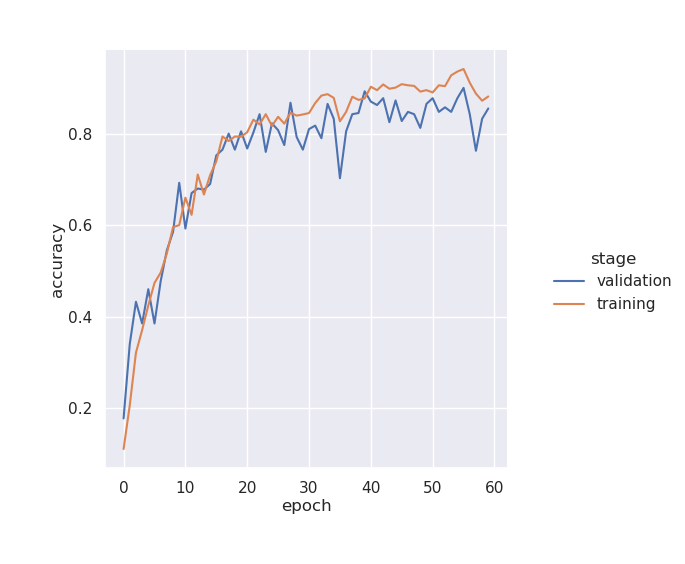

In [12]:
plt.clf()
ax = sns.relplot(data=results_df, x='epoch', y='accuracy', hue='stage', kind='line')
plt.show()

<Figure size 825x587.5 with 0 Axes>

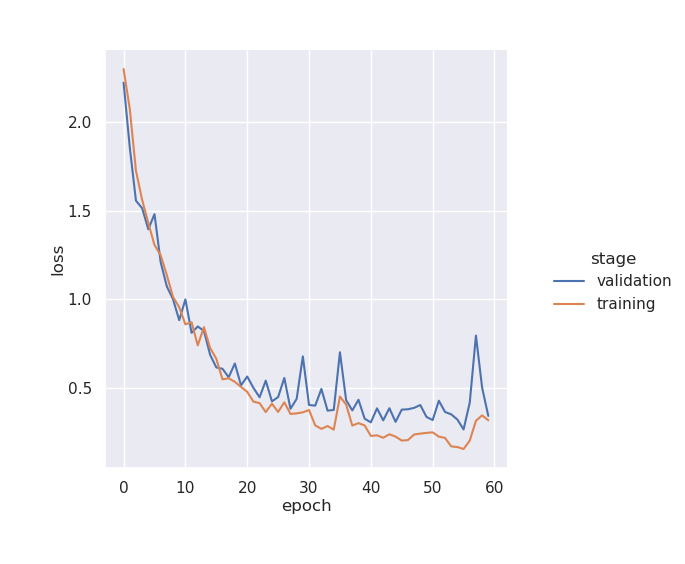

In [13]:
plt.clf()
ax = sns.relplot(data=results_df, x='epoch', y='loss', hue='stage', kind='line')
plt.show()

Seems like an epoch of 40 is good enough.

In [14]:
incorrect_X: np.ndarray = np.stack(df_incorrect['reshaped_skeleton'].values)
incorrect_y: np.ndarray = df_incorrect['movement_id'].values

incorrect_X.shape, incorrect_y.shape

((1000, 180, 22, 3), (1000,))

In [15]:
best_model = model
best_model.load_weights(best_model_checkpoint_path)
best_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 180, 22, 3)       3         
 n)                                                              
                                                                 
 reshape (Reshape)           (None, 180, 66)           0         
                                                                 
 lstm (LSTM)                 (None, 180, 64)           33536     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 10)                330       
                                                                 
Total params: 46,285
Trainable params: 46,282
Non-trainable params: 3
__________________________________________________

In [16]:
incorrect_y_pred: np.ndarray = np.argmax(best_model(incorrect_X).numpy(), axis=1)
incorrect_y_pred.shape

(1000,)

In [17]:
from sklearn.metrics import accuracy_score, f1_score

In [18]:
accuracy_score(incorrect_y, incorrect_y_pred), f1_score(incorrect_y, incorrect_y_pred, average='macro')

(0.005, 0.004478280340349306)

In [19]:
correct_X: np.ndarray = np.stack(df_correct['reshaped_skeleton'].values)
correct_y: np.ndarray = df_correct['movement_id'].values
    
correct_X.shape, correct_y.shape

((1000, 180, 22, 3), (1000,))

In [20]:
correct_y_pred: np.ndarray = np.argmax(best_model(correct_X).numpy(), axis=1)
correct_y_pred.shape

(1000,)

In [21]:
accuracy_score(correct_y, correct_y_pred), f1_score(correct_y, correct_y_pred, average='macro')

(0.002, 0.0018091361374943465)